# Laos Country

In [21]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [22]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [23]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [24]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [25]:
# Mengambil data untuk country tertentu
data_df = lifeladder_df.loc[lifeladder_df['country'] == 'Laos']
data_df['year'] = pd.to_datetime(data_df['year'], format='%Y')
data_df = pd.Series(data_df['Life_Ladder'].values, index=data_df.year, name='Life_Ladder')
data_df.index = pd.DatetimeIndex(data_df.index, 
                                      freq=data_df.index.inferred_freq)

data_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_16724\2450422249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['year'] = pd.to_datetime(data_df['year'], format='%Y')


year
1990-01-01    5.358995
1991-01-01    5.200206
1992-01-01    5.133100
1993-01-01    5.302642
1994-01-01    4.855309
1995-01-01    5.124728
1996-01-01    5.135511
1997-01-01    5.168397
1998-01-01    4.875788
1999-01-01    5.020036
2000-01-01    4.997242
2001-01-01    5.289830
2002-01-01    5.015656
2003-01-01    5.286575
2004-01-01    5.050610
2005-01-01    5.098433
2006-01-01    5.076226
2007-01-01    5.363855
2008-01-01    5.044099
2009-01-01    4.930756
2010-01-01    5.151898
2011-01-01    4.703750
2012-01-01    4.876085
2013-01-01    5.137963
2014-01-01    5.090284
2015-01-01    5.031620
2016-01-01    5.268682
2017-01-01    4.780027
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [26]:
data_list = data_df.tolist()
data_list

[5.358994615060706,
 5.200205865916922,
 5.133099868697315,
 5.302641714636875,
 4.855309087791138,
 5.124728347566861,
 5.135511022236239,
 5.1683966637525,
 4.875787942852602,
 5.020035921175872,
 4.997242228949949,
 5.289829551483807,
 5.015655557806608,
 5.286574765909332,
 5.050610221223897,
 5.098433150486587,
 5.076225757598877,
 5.363854885101318,
 5.044098854064941,
 4.930756476684962,
 5.151898337935938,
 4.703749656677246,
 4.876084804534912,
 5.137962501311213,
 5.090284323164735,
 5.03162033732934,
 5.268682493738695,
 4.780026738784003]

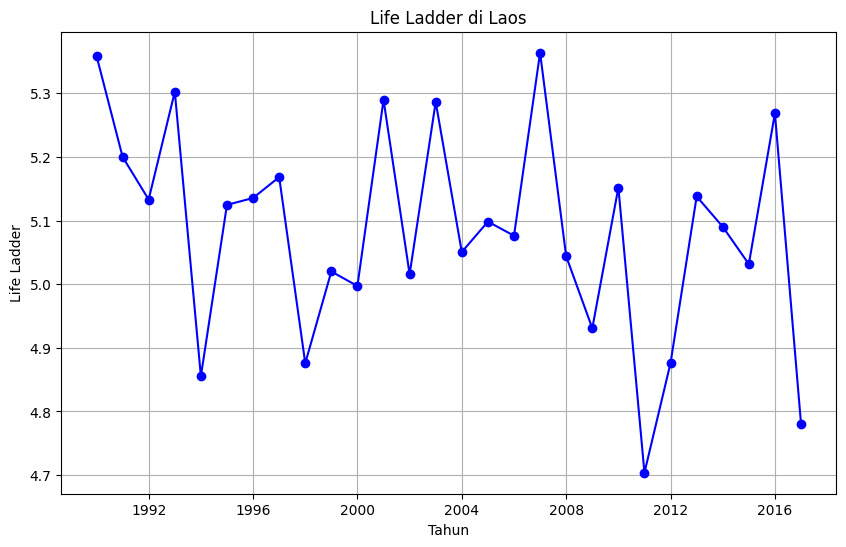

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data_df.index, data_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Laos')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

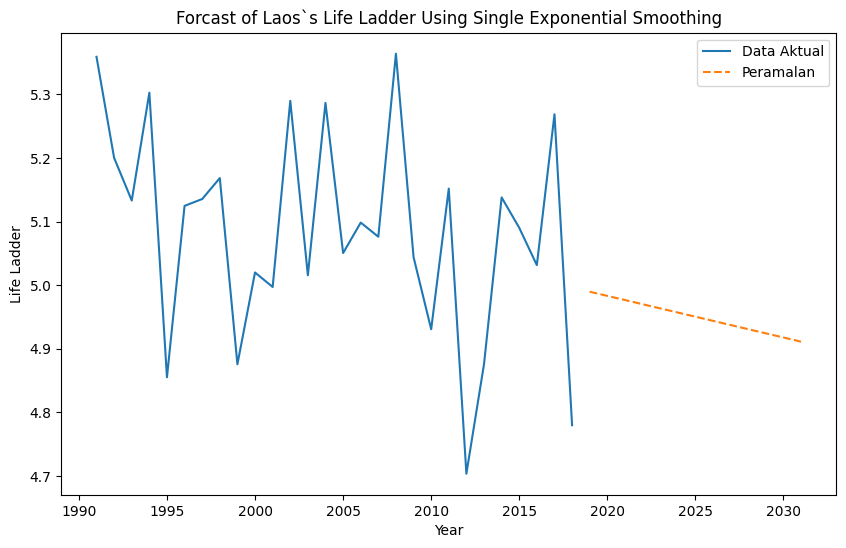

            forecast
2018-12-31  4.989811
2019-12-31  4.983268
2020-12-31  4.976725
2021-12-31  4.970182
2022-12-31  4.963639
2023-12-31  4.957096
2024-12-31  4.950553
2025-12-31  4.944010
2026-12-31  4.937466
2027-12-31  4.930923
2028-12-31  4.924380
2029-12-31  4.917837
2030-12-31  4.911294


In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Forcast of Laos`s Life Ladder Using Single Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)

forecast_df.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\laos_for_ses.xlsx", index=False)



### Moving Average

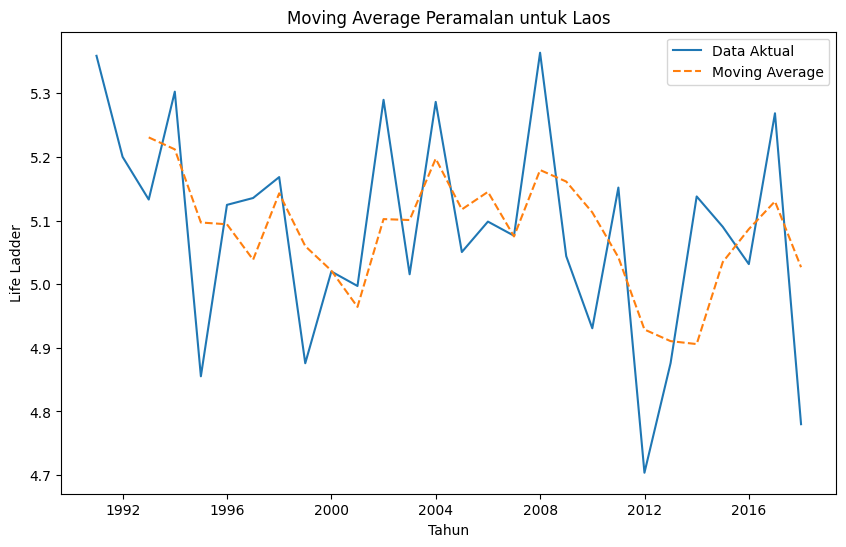

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Laos')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

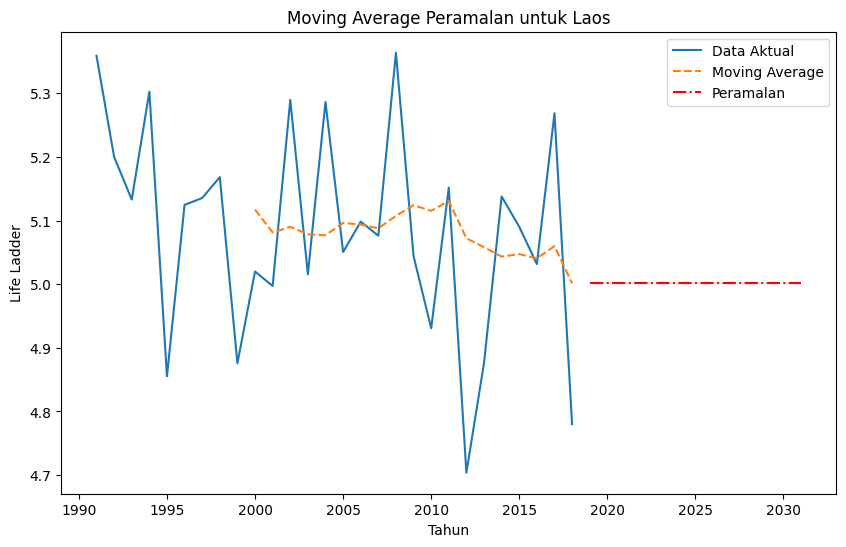

            forecast
year                
2018-12-31  5.001516
2019-12-31  5.001516
2020-12-31  5.001516
2021-12-31  5.001516
2022-12-31  5.001516
2023-12-31  5.001516
2024-12-31  5.001516
2025-12-31  5.001516
2026-12-31  5.001516
2027-12-31  5.001516
2028-12-31  5.001516
2029-12-31  5.001516
2030-12-31  5.001516


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Laos')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

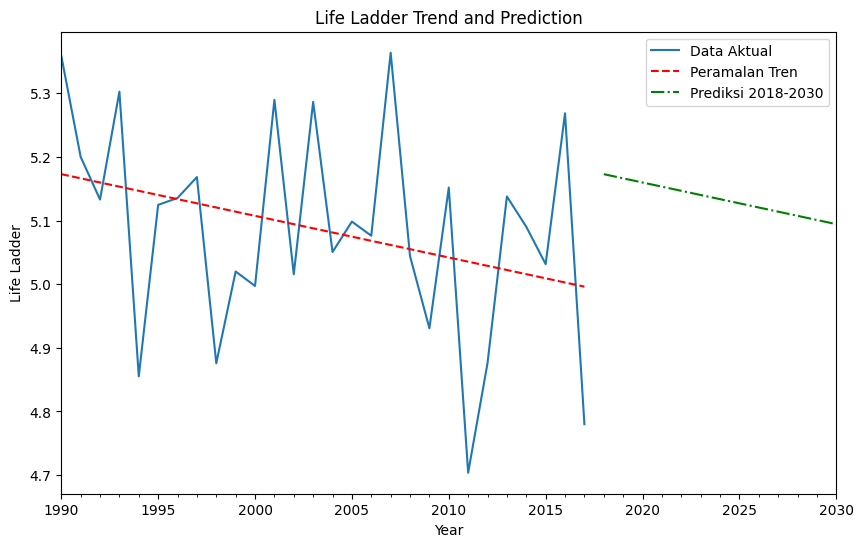

2018-12-31    5.172991
2019-12-31    5.166442
2020-12-31    5.159893
2021-12-31    5.153345
2022-12-31    5.146796
2023-12-31    5.140247
2024-12-31    5.133698
2025-12-31    5.127149
2026-12-31    5.120601
2027-12-31    5.114052
2028-12-31    5.107503
2029-12-31    5.100954
2030-12-31    5.094405
Freq: A-DEC, dtype: float64


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years, name='Life_Ladder')

# Menambahkan tren
data_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
data_lm = sm.OLS(data_df['Life_Ladder'], data_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = data_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Life Ladder Trend and Prediction')
data_lm.predict(data_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)


In [32]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [33]:
# Mengambil data untuk country tertentu
brunei_df = lifeladder_df.loc[lifeladder_df['country'] == 'Brunei']
brunei_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
5,1995,Brunei,6.348373
6,1996,Brunei,6.734922
7,1997,Brunei,6.597460
8,1998,Brunei,6.598677
9,1999,Brunei,6.680745


### ARIMA

Forecast for Laos's Life Ladder (2018-2030):
            forecast
2018-12-31  5.088219
2019-12-31  5.035491
2020-12-31  5.044512
2021-12-31  5.042969
2022-12-31  5.043233
2023-12-31  5.043188
2024-12-31  5.043195
2025-12-31  5.043194
2026-12-31  5.043194
2027-12-31  5.043194
2028-12-31  5.043194
2029-12-31  5.043194
2030-12-31  5.043194


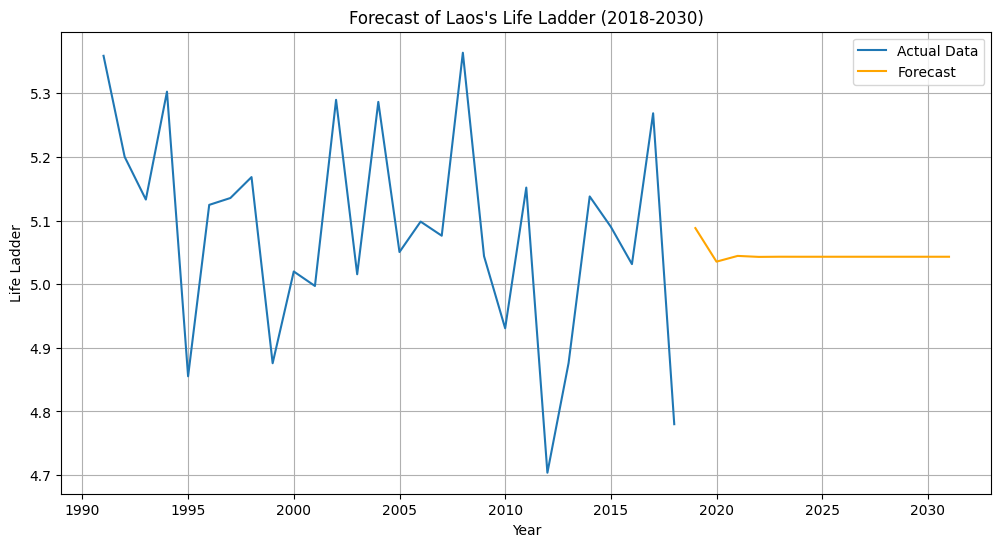

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Laos's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Laos's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
data_df_new = pd.DataFrame({'Life_Ladder': data_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = data_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = data_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [36]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
data_df['Moving Average'] = data_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = data_df['Life_Ladder']
ma_forecast = data_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [37]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[5.11286238 5.0520435  5.11666356 5.06724822 5.14707299 5.10145884
 5.08245294 5.06344704 5.10526002]
[5.02836432 5.02155141 5.01473851 5.0079256  5.00111269 4.99429978
 4.98748687 4.98067397 4.97386106]
[5.10130312 5.09776804 5.09740272 5.09736496 5.09736106 5.09736066
 5.09736062 5.09736061 5.09736061]
1998-12-31    5.059899
1999-12-31    5.021407
2000-12-31    4.964355
2001-12-31    5.102369
2002-12-31    5.100909
2003-12-31    5.197353
2004-12-31    5.117614
2005-12-31    5.145206
2006-12-31    5.075090
2007-12-31    5.179505
2008-12-31    5.161393
2009-12-31    5.112903
2010-12-31    5.042251
2011-12-31    4.928801
2012-12-31    4.910578
2013-12-31    4.905932
2014-12-31    5.034777
2015-12-31    5.086622
2016-12-31    5.130196
2017-12-31    5.026777
Freq: A-DEC, Name: Moving Average, dtype: float64


In [38]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.181965  3.546805  0.234038
1  Linier Regresion  0.185409  3.685132  0.210770
2    Moving Average  0.104944  2.082886  0.129600
3             ARIMA  0.198469  3.944750  0.222905


In [39]:
print(data_list)

[5.358994615060706, 5.200205865916922, 5.133099868697315, 5.302641714636875, 4.855309087791138, 5.124728347566861, 5.135511022236239, 5.1683966637525, 4.875787942852602, 5.020035921175872, 4.997242228949949, 5.289829551483807, 5.015655557806608, 5.286574765909332, 5.050610221223897, 5.098433150486587, 5.076225757598877, 5.363854885101318, 5.044098854064941, 4.930756476684962, 5.151898337935938, 4.703749656677246, 4.876084804534912, 5.137962501311213, 5.090284323164735, 5.03162033732934, 5.268682493738695, 4.780026738784003]


In [40]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [4.930756476684962, 5.151898337935938, 4.703749656677246, 4.876084804534912, 5.137962501311213, 5.090284323164735, 5.03162033732934, 5.268682493738695, 4.780026738784003]
ses_forecast = [5.02836431,5.02155141,5.0147385,5.00792559,5.00111268,4.99429977,4.98748686,4.98067396,4.97386105]
ma_forecast = [ 4.910578,4.905932,5.034777,5.086622,5.130196,5.026777, 5.086622,5.130196,5.026777]
lr_forecast = [5.11286238, 5.0520435, 5.11666356,5.06724822,5.14707299,5.10145884,5.08245294,5.06344704,5.10526002]
arima_forecast = [5.10148456,5.09794547,5.09757737,5.09753908,5.0975351,5.09753468, 5.09753464, 5.09753464,5.09753464]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,4.930756,5.028364,5.112862,4.910578,5.101303
1,2010-12-31,5.151898,5.021551,5.052044,4.905932,5.097768
2,2011-12-31,4.703750,5.014739,5.116664,5.034777,5.097403
3,2012-12-31,4.876085,5.007926,5.067248,5.086622,5.097365
4,2013-12-31,5.137963,5.001113,5.147073,5.130196,5.097361
5,2014-12-31,5.090284,4.994300,5.101459,5.026777,5.097361
6,2015-12-31,5.031620,4.987487,5.082453,5.086622,5.097361
7,2016-12-31,5.268682,4.980674,5.063447,5.130196,5.097361
8,2017-12-31,4.780027,4.973861,5.105260,5.026777,5.097361
